In [1]:
import pandas as pd
import numpy as np
#print('PyCaret: %s' % pycaret.__version__)
import matplotlib.pyplot as plt

In [2]:
#df_qtrly = pd.read_csv('df_qtrly_sales_flat.csv').set_index('Unnamed: 0')
df_annual = pd.read_csv('df_annual_sales_flat.csv').set_index('Unnamed: 0')
df_balancesheet = pd.read_csv('df_other_fundamentals.csv').set_index('Unnamed: 0')

# This is not monthly but 3 yrs delta return
#df_bhav_return = pd.read_csv('df_bhav_1yr_delta.csv').set_index('Unnamed: 0')
df_bhav_return = pd.read_csv('df_bhav_2yr_delta.csv').set_index('Unnamed: 0')
df_bhav_monthly_delta = pd.read_csv('df_bhav_monthly_delta.csv').set_index('Unnamed: 0')

In [3]:
# Merging the three dataframes
#df_fundamentals = pd.merge(df_annual, df_qtrly, how='left',left_on=['Tikr'], right_on=['Tikr'])
df_fundamentals = pd.merge(df_annual, df_balancesheet, how='left',left_on=['Tikr'], right_on=['Tikr'])
df_merge =  pd.merge(df_fundamentals,df_bhav_return, how='left',left_on=['Tikr'], right_on=['Tikr'])
df_merge =  pd.merge(df_merge,df_bhav_monthly_delta, how='left',left_on=['Tikr'], right_on=['Tikr'])
pd.DataFrame(df_merge.columns).to_clipboard()
#pd.DataFrame(df_merge).to_clipboard()

In [4]:
# Identifying columns having null values
null_values = df_merge.isna().sum()/len(df_merge)
pd.DataFrame(null_values).to_clipboard()

In [6]:
df_bhav_return.head()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Tikr
Unnamed: 0,,,,,,,,,,,
0,46.252404,-35.895244,-6.553172,1.840013,30.123639,41.650672,-10.602600,-30.527466,47.065665,NaN,20MICRONS
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-65.886751,68.226415,NaN,21STCENMGM
2,-11.329463,27.460108,165.611147,146.425890,46.426779,74.624307,63.205711,-5.152013,12.184931,NaN,3MINDIA
3,-50.525709,-29.359545,43.497637,20.911579,-6.210587,6.635933,-30.137870,-49.767894,46.580469,NaN,3PLAND
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-21.245460,-5.000002,NaN,3RDROCK


In [7]:
# Preparing a data frame for 2020 & 2021 Predictions

list_2020 = ['Tikr',        
            'Sales_2015','Sales_2016','Sales_2017','Sales_2018','Sales_2019',
            'Sales_2016_YoY','Sales_2017_YoY','Sales_2018_YoY','Sales_2019_YoY',
            'Revenue_2015','Revenue_2016','Revenue_2017','Revenue_2018','Revenue_2019',
            'Revenue_2016_YoY','Revenue_2017_YoY','Revenue_2018_YoY','Revenue_2019_YoY',
            'Expenses_2015','Expenses_2016','Expenses_2017','Expenses_2018','Expenses_2019',
            'Expenses_2016_YoY','Expenses_2017_YoY','Expenses_2018_YoY','Expenses_2019_YoY',
            'Net_Profit_2015','Net_Profit_2016','Net_Profit_2017','Net_Profit_2018','Net_Profit_2019',
            'Net_Profit_2016_YoY','Net_Profit_2017_YoY','Net_Profit_2018_YoY','Net_Profit_2019_YoY',
            'Operating_Profit_2015','Operating_Profit_2016','Operating_Profit_2017','Operating_Profit_2018','Operating_Profit_2019',
            'Operating_Profit_2016_YoY','Operating_Profit_2017_YoY','Operating_Profit_2018_YoY','Operating_Profit_2019_YoY',
            'EPS_in_Rs_2015','EPS_in_Rs_2016','EPS_in_Rs_2017','EPS_in_Rs_2018','EPS_in_Rs_2019',
            'EPS_in_Rs_2016_YoY','EPS_in_Rs_2017_YoY','EPS_in_Rs_2018_YoY','EPS_in_Rs_2019_YoY',
            'Tax__2015','Tax__2016','Tax__2017','Tax__2018','Tax__2019',
            'Tax__2016_YoY','Tax__2017_YoY','Tax__2018_YoY','Tax__2019_YoY',
            'OPM__2015','OPM__2016','OPM__2017','OPM__2018','OPM__2019',
            'OPM__2016_YoY','OPM__2017_YoY','OPM__2018_YoY','OPM__2019_YoY',
            'Other_Assets_2015','Other_Assets_2016','Other_Assets_2017','Other_Assets_2018','Other_Assets_2019',
            'Other_Assets_2016_YoY','Other_Assets_2017_YoY','Other_Assets_2018_YoY','Other_Assets_2019_YoY',
            'Total_Liabilities_2015','Total_Liabilities_2016','Total_Liabilities_2017','Total_Liabilities_2018','Total_Liabilities_2019',
            'Total_Liabilities_2016_YoY','Total_Liabilities_2017_YoY','Total_Liabilities_2018_YoY','Total_Liabilities_2019_YoY',
            'Share_Capital_2015','Share_Capital_2016','Share_Capital_2017','Share_Capital_2018','Share_Capital_2019',
            'Share_Capital_2016_YoY','Share_Capital_2017_YoY','Share_Capital_2018_YoY','Share_Capital_2019_YoY',
            'Investments_2015','Investments_2016','Investments_2017','Investments_2018','Investments_2019',
            'Investments_2016_YoY','Investments_2017_YoY','Investments_2018_YoY','Investments_2019_YoY',
            'Borrowings_2015','Borrowings_2016','Borrowings_2017','Borrowings_2018','Borrowings_2019',
            'Borrowings_2016_YoY','Borrowings_2017_YoY','Borrowings_2018_YoY','Borrowings_2019_YoY',
            'Reserves_2015','Reserves_2016','Reserves_2017','Reserves_2018','Reserves_2019',
            'Reserves_2016_YoY','Reserves_2017_YoY','Reserves_2018_YoY','Reserves_2019_YoY',
            'Total_Assets_2015','Total_Assets_2016','Total_Assets_2017','Total_Assets_2018','Total_Assets_2019',
            'Total_Assets_2016_YoY','Total_Assets_2017_YoY','Total_Assets_2018_YoY','Total_Assets_2019_YoY',
            'Fixed_Assets_2015','Fixed_Assets_2016','Fixed_Assets_2017','Fixed_Assets_2018','Fixed_Assets_2019',
            'Fixed_Assets_2016_YoY','Fixed_Assets_2017_YoY','Fixed_Assets_2018_YoY','Fixed_Assets_2019_YoY',
            'Other_Liabilities_2015','Other_Liabilities_2016','Other_Liabilities_2017','Other_Liabilities_2018','Other_Liabilities_2019',
            'Other_Liabilities_2016_YoY','Other_Liabilities_2017_YoY','Other_Liabilities_2018_YoY','Other_Liabilities_2019_YoY',
            'CWIP_2015','CWIP_2016','CWIP_2017','CWIP_2018','CWIP_2019',
            'CWIP_2016_YoY','CWIP_2017_YoY','CWIP_2018_YoY','CWIP_2019_YoY',
            'Cash_from_Investing_Activity_2015','Cash_from_Investing_Activity_2016','Cash_from_Investing_Activity_2017','Cash_from_Investing_Activity_2018','Cash_from_Investing_Activity_2019',
            'Cash_from_Investing_Activity_2016_YoY','Cash_from_Investing_Activity_2017_YoY','Cash_from_Investing_Activity_2018_YoY','Cash_from_Investing_Activity_2019_YoY',
            'Cash_from_Operating_Activity_2015','Cash_from_Operating_Activity_2016','Cash_from_Operating_Activity_2017','Cash_from_Operating_Activity_2018','Cash_from_Operating_Activity_2019',
            'Cash_from_Operating_Activity_2016_YoY','Cash_from_Operating_Activity_2017_YoY','Cash_from_Operating_Activity_2018_YoY','Cash_from_Operating_Activity_2019_YoY',
            'Cash_from_Financing_Activity_2015','Cash_from_Financing_Activity_2016','Cash_from_Financing_Activity_2017','Cash_from_Financing_Activity_2018','Cash_from_Financing_Activity_2019',
            'Cash_from_Financing_Activity_2016_YoY','Cash_from_Financing_Activity_2017_YoY','Cash_from_Financing_Activity_2018_YoY','Cash_from_Financing_Activity_2019_YoY',
            'Net_Cash_Flow_2015','Net_Cash_Flow_2016','Net_Cash_Flow_2017','Net_Cash_Flow_2018','Net_Cash_Flow_2019',
            'Net_Cash_Flow_2016_YoY','Net_Cash_Flow_2017_YoY','Net_Cash_Flow_2018_YoY','Net_Cash_Flow_2019_YoY',
            'Share_Capital_%_2015','Share_Capital_%_2016','Share_Capital_%_2017','Share_Capital_%_2018','Share_Capital_%_2019',
            'Reserves_%_2015','Reserves_%_2016','Reserves_%_2017','Reserves_%_2018','Reserves_%_2019',
            'Borrowings_%_2015','Borrowings_%_2016','Borrowings_%_2017','Borrowings_%_2018','Borrowings_%_2019',
            'Other_Liabilities_%_2015','Other_Liabilities_%_2016','Other_Liabilities_%_2017','Other_Liabilities_%_2018','Other_Liabilities_%_2019',
            'Fixed_Assets_%_2015','Fixed_Assets_%_2016','Fixed_Assets_%_2017','Fixed_Assets_%_2018','Fixed_Assets_%_2019',
            'CWIP_%_2015','CWIP_%_2016','CWIP_%_2017','CWIP_%_2018','CWIP_%_2019',
            'Investments_%_2015','Investments_%_2016','Investments_%_2017','Investments_%_2018','Investments_%_2019',
            'Other_Assets_%_2015','Other_Assets_%_2016','Other_Assets_%_2017','Other_Assets_%_2018','Other_Assets_%_2019',
            'MarketCap','CapFlag','LageCap','MidCap','SmallCap','TinyCap','Industry',
            '2019_01_CLOSE','2019_02_CLOSE','2019_03_CLOSE','2019_04_CLOSE','2019_05_CLOSE','2019_06_CLOSE','2019_07_CLOSE','2019_08_CLOSE','2019_09_CLOSE','2019_10_CLOSE','2019_11_CLOSE','2019_12_CLOSE']

list_2021 = ['Tikr',
            'Sales_2016','Sales_2017','Sales_2018','Sales_2019','Sales_2020',
            'Sales_2017_YoY','Sales_2018_YoY','Sales_2019_YoY','Sales_2020_YoY',
            'Revenue_2016','Revenue_2017','Revenue_2018','Revenue_2019','Revenue_2020',
            'Revenue_2017_YoY','Revenue_2018_YoY','Revenue_2019_YoY','Revenue_2020_YoY',
            'Expenses_2016','Expenses_2017','Expenses_2018','Expenses_2019','Expenses_2020',
            'Expenses_2017_YoY','Expenses_2018_YoY','Expenses_2019_YoY','Expenses_2020_YoY',
            'Net_Profit_2016','Net_Profit_2017','Net_Profit_2018','Net_Profit_2019','Net_Profit_2020',
            'Net_Profit_2017_YoY','Net_Profit_2018_YoY','Net_Profit_2019_YoY','Net_Profit_2020_YoY',
            'Operating_Profit_2016','Operating_Profit_2017','Operating_Profit_2018','Operating_Profit_2019','Operating_Profit_2020',
            'Operating_Profit_2017_YoY','Operating_Profit_2018_YoY','Operating_Profit_2019_YoY','Operating_Profit_2020_YoY',
            'EPS_in_Rs_2016','EPS_in_Rs_2017','EPS_in_Rs_2018','EPS_in_Rs_2019','EPS_in_Rs_2020',
            'EPS_in_Rs_2017_YoY','EPS_in_Rs_2018_YoY','EPS_in_Rs_2019_YoY','EPS_in_Rs_2020_YoY',
            'Tax__2016','Tax__2017','Tax__2018','Tax__2019','Tax__2020',
            'Tax__2017_YoY','Tax__2018_YoY','Tax__2019_YoY','Tax__2020_YoY',
            'OPM__2016','OPM__2017','OPM__2018','OPM__2019','OPM__2020',
            'OPM__2017_YoY','OPM__2018_YoY','OPM__2019_YoY','OPM__2020_YoY',
            'Other_Assets_2016','Other_Assets_2017','Other_Assets_2018','Other_Assets_2019','Other_Assets_2020',
            'Other_Assets_2017_YoY','Other_Assets_2018_YoY','Other_Assets_2019_YoY','Other_Assets_2020_YoY',
            'Total_Liabilities_2016','Total_Liabilities_2017','Total_Liabilities_2018','Total_Liabilities_2019','Total_Liabilities_2020',
            'Total_Liabilities_2017_YoY','Total_Liabilities_2018_YoY','Total_Liabilities_2019_YoY','Total_Liabilities_2020_YoY',
            'Share_Capital_2016','Share_Capital_2017','Share_Capital_2018','Share_Capital_2019','Share_Capital_2020',
            'Share_Capital_2017_YoY','Share_Capital_2018_YoY','Share_Capital_2019_YoY','Share_Capital_2020_YoY',
            'Investments_2016','Investments_2017','Investments_2018','Investments_2019','Investments_2020',
            'Investments_2017_YoY','Investments_2018_YoY','Investments_2019_YoY','Investments_2020_YoY',
            'Borrowings_2016','Borrowings_2017','Borrowings_2018','Borrowings_2019','Borrowings_2020',
            'Borrowings_2017_YoY','Borrowings_2018_YoY','Borrowings_2019_YoY','Borrowings_2020_YoY',
            'Reserves_2016','Reserves_2017','Reserves_2018','Reserves_2019','Reserves_2020',
            'Reserves_2017_YoY','Reserves_2018_YoY','Reserves_2019_YoY','Reserves_2020_YoY',
            'Total_Assets_2016','Total_Assets_2017','Total_Assets_2018','Total_Assets_2019','Total_Assets_2020',
            'Total_Assets_2017_YoY','Total_Assets_2018_YoY','Total_Assets_2019_YoY','Total_Assets_2020_YoY',
            'Fixed_Assets_2016','Fixed_Assets_2017','Fixed_Assets_2018','Fixed_Assets_2019','Fixed_Assets_2020',
            'Fixed_Assets_2017_YoY','Fixed_Assets_2018_YoY','Fixed_Assets_2019_YoY','Fixed_Assets_2020_YoY',
            'Other_Liabilities_2016','Other_Liabilities_2017','Other_Liabilities_2018','Other_Liabilities_2019','Other_Liabilities_2020',
            'Other_Liabilities_2017_YoY','Other_Liabilities_2018_YoY','Other_Liabilities_2019_YoY','Other_Liabilities_2020_YoY',
            'CWIP_2016','CWIP_2017','CWIP_2018','CWIP_2019','CWIP_2020',
            'CWIP_2017_YoY','CWIP_2018_YoY','CWIP_2019_YoY','CWIP_2020_YoY',
            'Cash_from_Investing_Activity_2016','Cash_from_Investing_Activity_2017','Cash_from_Investing_Activity_2018','Cash_from_Investing_Activity_2019','Cash_from_Investing_Activity_2020',
            'Cash_from_Investing_Activity_2017_YoY','Cash_from_Investing_Activity_2018_YoY','Cash_from_Investing_Activity_2019_YoY','Cash_from_Investing_Activity_2020_YoY',
            'Cash_from_Operating_Activity_2016','Cash_from_Operating_Activity_2017','Cash_from_Operating_Activity_2018','Cash_from_Operating_Activity_2019','Cash_from_Operating_Activity_2020',
            'Cash_from_Operating_Activity_2017_YoY','Cash_from_Operating_Activity_2018_YoY','Cash_from_Operating_Activity_2019_YoY','Cash_from_Operating_Activity_2020_YoY',
            'Cash_from_Financing_Activity_2016','Cash_from_Financing_Activity_2017','Cash_from_Financing_Activity_2018','Cash_from_Financing_Activity_2019','Cash_from_Financing_Activity_2020',
            'Cash_from_Financing_Activity_2017_YoY','Cash_from_Financing_Activity_2018_YoY','Cash_from_Financing_Activity_2019_YoY','Cash_from_Financing_Activity_2020_YoY',
            'Net_Cash_Flow_2016','Net_Cash_Flow_2017','Net_Cash_Flow_2018','Net_Cash_Flow_2019','Net_Cash_Flow_2020',
            'Net_Cash_Flow_2017_YoY','Net_Cash_Flow_2018_YoY','Net_Cash_Flow_2019_YoY','Net_Cash_Flow_2020_YoY',
            'Share_Capital_%_2016','Share_Capital_%_2017','Share_Capital_%_2018','Share_Capital_%_2019','Share_Capital_%_2020',
            'Reserves_%_2016','Reserves_%_2017','Reserves_%_2018','Reserves_%_2019','Reserves_%_2020',
            'Borrowings_%_2016','Borrowings_%_2017','Borrowings_%_2018','Borrowings_%_2019','Borrowings_%_2020',
            'Other_Liabilities_%_2016','Other_Liabilities_%_2017','Other_Liabilities_%_2018','Other_Liabilities_%_2019','Other_Liabilities_%_2020',
            'Fixed_Assets_%_2016','Fixed_Assets_%_2017','Fixed_Assets_%_2018','Fixed_Assets_%_2019','Fixed_Assets_%_2020',
            'CWIP_%_2016','CWIP_%_2017','CWIP_%_2018','CWIP_%_2019','CWIP_%_2020',
            'Investments_%_2016','Investments_%_2017','Investments_%_2018','Investments_%_2019','Investments_%_2020',
            'Other_Assets_%_2016','Other_Assets_%_2017','Other_Assets_%_2018','Other_Assets_%_2019','Other_Assets_%_2020',
            'MarketCap','CapFlag','LageCap','MidCap','SmallCap','TinyCap','Industry',
            '2020_01_CLOSE','2020_02_CLOSE','2020_03_CLOSE','2020_04_CLOSE','2020_05_CLOSE','2020_06_CLOSE','2020_07_CLOSE','2020_08_CLOSE','2020_09_CLOSE','2020_10_CLOSE','2020_11_CLOSE','2020_12_CLOSE']

df_2020 = df_merge[list_2020]
df_2020['Year'] = '2020'
df_2021 = df_merge[list_2021]
df_2021['Year'] = '2021'

col_names = ['Tikr','Sales_yr_1','Sales_yr_2','Sales_yr_3','Sales_yr_4','Sales_yr_5',
            'Sales_yr_2_YoY','Sales_yr_3_YoY','Sales_yr_4_YoY','Sales_yr_5_YoY',
            'Revenue_yr_1','Revenue_yr_2','Revenue_yr_3','Revenue_yr_4','Revenue_yr_5',
            'Revenue_yr_2_YoY','Revenue_yr_3_YoY','Revenue_yr_4_YoY','Revenue_yr_5_YoY',
            'Expenses_yr_1','Expenses_yr_2','Expenses_yr_3','Expenses_yr_4','Expenses_yr_5',
            'Expenses_yr_2_YoY','Expenses_yr_3_YoY','Expenses_yr_4_YoY','Expenses_yr_5_YoY',
            'Net_Profit_yr_1','Net_Profit_yr_2','Net_Profit_yr_3','Net_Profit_yr_4','Net_Profit_yr_5',
            'Net_Profit_yr_2_YoY','Net_Profit_yr_3_YoY','Net_Profit_yr_4_YoY','Net_Profit_yr_5_YoY',
            'Operating_Profit_yr_1','Operating_Profit_yr_2','Operating_Profit_yr_3','Operating_Profit_yr_4','Operating_Profit_yr_5',
            'Operating_Profit_yr_2_YoY','Operating_Profit_yr_3_YoY','Operating_Profit_yr_4_YoY','Operating_Profit_yr_5_YoY',
            'EPS_in_Rs_yr_1','EPS_in_Rs_yr_2','EPS_in_Rs_yr_3','EPS_in_Rs_yr_4','EPS_in_Rs_yr_5',
            'EPS_in_Rs_yr_2_YoY','EPS_in_Rs_yr_3_YoY','EPS_in_Rs_yr_4_YoY','EPS_in_Rs_yr_5_YoY',
            'Tax__yr_1','Tax__yr_2','Tax__yr_3','Tax__yr_4','Tax__yr_5',
            'Tax__yr_2_YoY','Tax__yr_3_YoY','Tax__yr_4_YoY','Tax__yr_5_YoY',
            'OPM__yr_1','OPM__yr_2','OPM__yr_3','OPM__yr_4','OPM__yr_5',
            'OPM__yr_2_YoY','OPM__yr_3_YoY','OPM__yr_4_YoY','OPM__yr_5_YoY',
            'Other_Assets_yr_1','Other_Assets_yr_2','Other_Assets_yr_3','Other_Assets_yr_4','Other_Assets_yr_5',
            'Other_Assets_yr_2_YoY','Other_Assets_yr_3_YoY','Other_Assets_yr_4_YoY','Other_Assets_yr_5_YoY',
            'Total_Liabilities_yr_1','Total_Liabilities_yr_2','Total_Liabilities_yr_3','Total_Liabilities_yr_4','Total_Liabilities_yr_5',
            'Total_Liabilities_yr_2_YoY','Total_Liabilities_yr_3_YoY','Total_Liabilities_yr_4_YoY','Total_Liabilities_yr_5_YoY',
            'Share_Capital_yr_1','Share_Capital_yr_2','Share_Capital_yr_3','Share_Capital_yr_4','Share_Capital_yr_5',
            'Share_Capital_yr_2_YoY','Share_Capital_yr_3_YoY','Share_Capital_yr_4_YoY','Share_Capital_yr_5_YoY',
            'Investments_yr_1','Investments_yr_2','Investments_yr_3','Investments_yr_4','Investments_yr_5',
            'Investments_yr_2_YoY','Investments_yr_3_YoY','Investments_yr_4_YoY','Investments_yr_5_YoY',
            'Borrowings_yr_1','Borrowings_yr_2','Borrowings_yr_3','Borrowings_yr_4','Borrowings_yr_5',
            'Borrowings_yr_2_YoY','Borrowings_yr_3_YoY','Borrowings_yr_4_YoY','Borrowings_yr_5_YoY',
            'Reserves_yr_1','Reserves_yr_2','Reserves_yr_3','Reserves_yr_4','Reserves_yr_5',
            'Reserves_yr_2_YoY','Reserves_yr_3_YoY','Reserves_yr_4_YoY','Reserves_yr_5_YoY',
            'Total_Assets_yr_1','Total_Assets_yr_2','Total_Assets_yr_3','Total_Assets_yr_4','Total_Assets_yr_5',
            'Total_Assets_yr_2_YoY','Total_Assets_yr_3_YoY','Total_Assets_yr_4_YoY','Total_Assets_yr_5_YoY',
            'Fixed_Assets_yr_1','Fixed_Assets_yr_2','Fixed_Assets_yr_3','Fixed_Assets_yr_4','Fixed_Assets_yr_5',
            'Fixed_Assets_yr_2_YoY','Fixed_Assets_yr_3_YoY','Fixed_Assets_yr_4_YoY','Fixed_Assets_yr_5_YoY',
            'Other_Liabilities_yr_1','Other_Liabilities_yr_2','Other_Liabilities_yr_3','Other_Liabilities_yr_4','Other_Liabilities_yr_5',
            'Other_Liabilities_yr_2_YoY','Other_Liabilities_yr_3_YoY','Other_Liabilities_yr_4_YoY','Other_Liabilities_yr_5_YoY',
            'CWIP_yr_1','CWIP_yr_2','CWIP_yr_3','CWIP_yr_4','CWIP_yr_5',
            'CWIP_yr_2_YoY','CWIP_yr_3_YoY','CWIP_yr_4_YoY','CWIP_yr_5_YoY',
            'Cash_from_Investing_Activity_yr_1','Cash_from_Investing_Activity_yr_2','Cash_from_Investing_Activity_yr_3','Cash_from_Investing_Activity_yr_4','Cash_from_Investing_Activity_yr_5',
            'Cash_from_Investing_Activity_yr_2_YoY','Cash_from_Investing_Activity_yr_3_YoY','Cash_from_Investing_Activity_yr_4_YoY','Cash_from_Investing_Activity_yr_5_YoY',
            'Cash_from_Operating_Activity_yr_1','Cash_from_Operating_Activity_yr_2','Cash_from_Operating_Activity_yr_3','Cash_from_Operating_Activity_yr_4','Cash_from_Operating_Activity_yr_5',
            'Cash_from_Operating_Activity_yr_2_YoY','Cash_from_Operating_Activity_yr_3_YoY','Cash_from_Operating_Activity_yr_4_YoY','Cash_from_Operating_Activity_yr_5_YoY',
            'Cash_from_Financing_Activity_yr_1','Cash_from_Financing_Activity_yr_2','Cash_from_Financing_Activity_yr_3','Cash_from_Financing_Activity_yr_4','Cash_from_Financing_Activity_yr_5',
            'Cash_from_Financing_Activity_yr_2_YoY','Cash_from_Financing_Activity_yr_3_YoY','Cash_from_Financing_Activity_yr_4_YoY','Cash_from_Financing_Activity_yr_5_YoY',
            'Net_Cash_Flow_yr_1','Net_Cash_Flow_yr_2','Net_Cash_Flow_yr_3','Net_Cash_Flow_yr_4','Net_Cash_Flow_yr_5',
            'Net_Cash_Flow_yr_2_YoY','Net_Cash_Flow_yr_3_YoY','Net_Cash_Flow_yr_4_YoY','Net_Cash_Flow_yr_5_YoY',
            'Share_Capital_%_yr_1','Share_Capital_%_yr_2','Share_Capital_%_yr_3','Share_Capital_%_yr_4','Share_Capital_%_yr_5',
            'Reserves_%_yr_1','Reserves_%_yr_2','Reserves_%_yr_3','Reserves_%_yr_4','Reserves_%_yr_5',
            'Borrowings_%_yr_1','Borrowings_%_yr_2','Borrowings_%_yr_3','Borrowings_%_yr_4','Borrowings_%_yr_5',
            'Other_Liabilities_%_yr_1','Other_Liabilities_%_yr_2','Other_Liabilities_%_yr_3','Other_Liabilities_%_yr_4','Other_Liabilities_%_yr_5',
            'Fixed_Assets_%_yr_1','Fixed_Assets_%_yr_2','Fixed_Assets_%_yr_3','Fixed_Assets_%_yr_4','Fixed_Assets_%_yr_5',
            'CWIP_%_yr_1','CWIP_%_yr_2','CWIP_%_yr_3','CWIP_%_yr_4','CWIP_%_yr_5',
            'Investments_%_yr_1','Investments_%_yr_2','Investments_%_yr_3','Investments_%_yr_4','Investments_%_yr_5',
            'Other_Assets_%_yr_1','Other_Assets_%_yr_2','Other_Assets_%_yr_3','Other_Assets_%_yr_4','Other_Assets_%_yr_5',
            'MarketCap','CapFlag','LageCap','MidCap','SmallCap','TinyCap','Industry',
            'Trend_lag_01','Trend_lag_02','Trend_lag_03','Trend_lag_04','Trend_lag_05','Trend_lag_06','Trend_lag_07','Trend_lag_08','Trend_lag_09','Trend_lag_10','Trend_lag_11','Trend_lag_12',
            'Year']

df_2020.columns = col_names
df_2021.columns = col_names

# df_append = pd.concat([df_2015.reset_index(drop=True), df_2016.reset_index(drop=True), df_2017.reset_index(drop=True),
#                        df_2018.reset_index(drop=True), df_2019.reset_index(drop=True), df_2020.reset_index(drop=True)], axis=1)

#df_2013,
df_append = pd.concat([df_2020, df_2021], ignore_index=True) #, df_2020, df_2021
#df_2020, Removed 2020 from the data purposefully in order to remove the bias that gets added due to Covid

C:\Users\hashmy\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hashmy\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
df_append.tail()
#df_append.shape

,Tikr,Sales_yr_1,Sales_yr_2,Sales_yr_3,Sales_yr_4,Sales_yr_5,Sales_yr_2_YoY,Sales_yr_3_YoY,Sales_yr_4_YoY,Sales_yr_5_YoY,...,Trend_lag_04,Trend_lag_05,Trend_lag_06,Trend_lag_07,Trend_lag_08,Trend_lag_09,Trend_lag_10,Trend_lag_11,Trend_lag_12,Year
3233,ZODJRDMKJ,16.09,18.06,20.0,14.85,12.54,12.243630,10.741971,-25.750000,-15.555556,...,-5.367832,4.237284,7.273714,23.231611,-11.012711,-7.989310,-3.104655,-1.519381,19.804785,2021
3234,ZOTA,64.00,70.00,77.0,85.00,95.00,9.375000,10.000000,10.389610,11.764706,...,0.813898,-5.062756,2.331398,-0.907823,2.797748,1.194742,-2.987320,-0.625662,9.348472,2021
3235,ZUARI,5264.00,4077.00,4648.0,4731.00,50.00,-22.549392,14.005396,1.785714,-98.943141,...,36.135815,-1.380640,22.522954,-10.224591,-2.044615,-6.477034,-3.899013,10.032644,7.933994,2021
3236,ZUARIGLOB,0.00,0.00,17.0,2.00,57.00,NaN,inf,-88.235294,2750.000000,...,41.249589,-7.907256,33.376375,-0.847054,5.657805,-8.707917,1.958763,9.403437,19.500928,2021
3237,ZYDUSWELL,200.00,225.00,264.0,255.00,153.00,12.500000,17.333333,-3.409091,-40.000000,...,7.940363,-8.970893,1.831343,17.392988,9.249993,10.447420,1.296365,-0.413475,6.794146,2021


In [9]:
# Getting rid of revenue columns.. since it is equivalent to sales for Financial Companies
df_append['Sales_yr_1'] = df_append[['Sales_yr_1','Revenue_yr_1']].sum(axis=1)
df_append['Sales_yr_2'] = df_append[['Sales_yr_2','Revenue_yr_2']].sum(axis=1)
df_append['Sales_yr_3'] = df_append[['Sales_yr_3','Revenue_yr_3']].sum(axis=1)
df_append['Sales_yr_4'] = df_append[['Sales_yr_4','Revenue_yr_3']].sum(axis=1)
df_append['Sales_yr_5'] = df_append[['Sales_yr_5','Revenue_yr_3']].sum(axis=1)

df_append['Sales_yr_2_YoY'] = df_append[['Sales_yr_2_YoY','Revenue_yr_2_YoY']].sum(axis=1)
df_append['Sales_yr_3_YoY'] = df_append[['Sales_yr_3_YoY','Revenue_yr_3_YoY']].sum(axis=1)
df_append['Sales_yr_4_YoY'] = df_append[['Sales_yr_4_YoY','Revenue_yr_4_YoY']].sum(axis=1)
df_append['Sales_yr_5_YoY'] = df_append[['Sales_yr_5_YoY','Revenue_yr_5_YoY']].sum(axis=1)

df_append.drop(['Revenue_yr_1','Revenue_yr_2','Revenue_yr_3','Revenue_yr_4','Revenue_yr_5',
                'Revenue_yr_2_YoY','Revenue_yr_3_YoY','Revenue_yr_4_YoY','Revenue_yr_5_YoY'],axis=1,inplace=True)

In [10]:
df_append[df_append['Tikr'] == 'RELIANCE']

,Tikr,Sales_yr_1,Sales_yr_2,Sales_yr_3,Sales_yr_4,Sales_yr_5,Sales_yr_2_YoY,Sales_yr_3_YoY,Sales_yr_4_YoY,Sales_yr_5_YoY,...,Trend_lag_04,Trend_lag_05,Trend_lag_06,Trend_lag_07,Trend_lag_08,Trend_lag_09,Trend_lag_10,Trend_lag_11,Trend_lag_12,Year
1180,RELIANCE,328013.0,231743.0,240597.0,289188.0,370744.0,-29.349447,3.820612,20.196012,28.201723,...,4.041177,-5.848739,-0.395328,-4.109350,0.791316,1.836642,11.955264,6.252540,3.976057,2020
2799,RELIANCE,231743.0,240597.0,289188.0,370744.0,336097.0,3.820612,20.196012,28.201723,-9.345262,...,20.251517,11.854526,14.656118,18.699352,5.315508,7.403538,-5.253854,-8.520659,1.695133,2021


In [12]:
df_append.to_csv('df_to_predict.csv')

In [14]:
df_append[df_append['Tikr'] == '20MICRONS']

,Tikr,Sales_yr_1,Sales_yr_2,Sales_yr_3,Sales_yr_4,Sales_yr_5,Sales_yr_2_YoY,Sales_yr_3_YoY,Sales_yr_4_YoY,Sales_yr_5_YoY,...,Trend_lag_04,Trend_lag_05,Trend_lag_06,Trend_lag_07,Trend_lag_08,Trend_lag_09,Trend_lag_10,Trend_lag_11,Trend_lag_12,Year
0,20MICRONS,311.0,333.0,357.0,385.0,436.0,7.073955,7.207207,7.843137,13.246753,...,-0.740745,-2.788687,-1.548822,-2.544456,-5.460416,11.269485,0.813986,-7.743218,-5.538020,2020
1619,20MICRONS,333.0,357.0,385.0,436.0,490.0,7.207207,7.843137,13.246753,12.385321,...,15.358187,-6.971581,17.155130,0.635595,1.246966,-7.749522,-2.860858,15.484156,18.585783,2021


<h1>###### Predictions for future returns ######<h1>

In [52]:
df_predict = pd.read_csv('df_to_predict.csv').set_index('Unnamed: 0')
#Shape : (3238, 250)
df_predict.shape

(3238, 250)

In [17]:
df_predict.head(4)

,Tikr,Sales_yr_1,Sales_yr_2,Sales_yr_3,Sales_yr_4,Sales_yr_5,Sales_yr_2_YoY,Sales_yr_3_YoY,Sales_yr_4_YoY,Sales_yr_5_YoY,...,Trend_lag_04,Trend_lag_05,Trend_lag_06,Trend_lag_07,Trend_lag_08,Trend_lag_09,Trend_lag_10,Trend_lag_11,Trend_lag_12,Year
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,20MICRONS,311.00,333.00,357.00,385.00,436.00,7.073955,7.207207,7.843137,13.246753,...,-0.740745,-2.788687,-1.548822,-2.544456,-5.460416,11.269485,0.813986,-7.743218,-5.538020,2020
1,21STCENMGM,37.13,2.88,1.92,10.51,8.58,-92.243469,-33.333333,447.395833,-18.363463,...,19.947230,-15.420152,-8.192455,-7.195471,-22.313794,-1.611002,3.234823,6.189557,4.335153,2020
2,3IINFOTECH,1437.00,1431.00,1521.00,1833.00,2076.00,-0.417537,6.289308,20.512821,13.256956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
3,3MINDIA,1840.00,2140.00,2363.00,2556.00,2809.00,16.304348,10.420561,8.167584,9.898279,...,-0.462411,-3.872242,-0.615183,-5.510708,-4.316329,-2.226585,6.413264,3.529203,-4.551347,2020


In [53]:
# Removing rows containing nans
#df_predict = df_predict[df_predict['Return'].notna()]
df_predict.shape
#8436,65
df_predict.replace([np.inf, -np.inf], 0, inplace=True)
df_predict.fillna(0, inplace=True)

#df_predict['Return_class'] = np.where(df_main['Return_adj'] > 0,1,0)
df_predict['Corona_Yr'] = np.where(df_predict['Year'] == 2020,1,0)

In [20]:
df_predict

,Tikr,Sales_yr_1,Sales_yr_2,Sales_yr_3,Sales_yr_4,Sales_yr_5,Sales_yr_2_YoY,Sales_yr_3_YoY,Sales_yr_4_YoY,Sales_yr_5_YoY,...,Trend_lag_05,Trend_lag_06,Trend_lag_07,Trend_lag_08,Trend_lag_09,Trend_lag_10,Trend_lag_11,Trend_lag_12,Year,Corona_Yr
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,20MICRONS,311.00,333.00,357.00,385.00,436.00,7.073955,7.207207,7.843137,13.246753,...,-2.788687,-1.548822,-2.544456,-5.460416,11.269485,0.813986,-7.743218,-5.538020,2020,1
1,21STCENMGM,37.13,2.88,1.92,10.51,8.58,-92.243469,-33.333333,447.395833,-18.363463,...,-15.420152,-8.192455,-7.195471,-22.313794,-1.611002,3.234823,6.189557,4.335153,2020,1
2,3IINFOTECH,1437.00,1431.00,1521.00,1833.00,2076.00,-0.417537,6.289308,20.512821,13.256956,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020,1
3,3MINDIA,1840.00,2140.00,2363.00,2556.00,2809.00,16.304348,10.420561,8.167584,9.898279,...,-3.872242,-0.615183,-5.510708,-4.316329,-2.226585,6.413264,3.529203,-4.551347,2020,1
4,3PLAND,157.05,0.09,0.08,0.14,1.84,-99.942693,-11.111111,75.000000,1214.285714,...,-3.785841,-17.229340,-10.210967,-19.172933,-6.666668,2.990030,0.403229,-6.345382,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,ZODJRDMKJ,16.09,18.06,20.00,14.85,12.54,12.243630,10.741971,-25.750000,-15.555556,...,4.237284,7.273714,23.231611,-11.012711,-7.989310,-3.104655,-1.519381,19.804785,2021,0
3234,ZOTA,64.00,70.00,77.00,85.00,95.00,9.375000,10.000000,10.389610,11.764706,...,-5.062756,2.331398,-0.907823,2.797748,1.194742,-2.987320,-0.625662,9.348472,2021,0
3235,ZUARI,5264.00,4077.00,4648.00,4731.00,50.00,-22.549392,14.005396,1.785714,-98.943141,...,-1.380640,22.522954,-10.224591,-2.044615,-6.477034,-3.899013,10.032644,7.933994,2021,0


In [54]:
import pickle
# Save to file in the current working directory
pkl_rf_model = ".\\Model\\rf_model.pkl"
pkl_xgb_model = ".\\Model\\xgb_model.pkl"
pkl_lgb_model = ".\\Model\\lgb_model.pkl"

#Importing models
rf_model = pickle.load(open(pkl_rf_model, 'rb'))    
xgb_model = pickle.load(open(pkl_xgb_model, 'rb'))
lgb_model = pickle.load(open(pkl_lgb_model, 'rb'))

In [55]:
To_Valiate = 2021
start_date = '2021-1-1'
end_date = '2021-12-31'
# Keeping 2018 data reserved for validation
df_validation_copy = df_predict[(df_predict['Year'] == To_Valiate)]
df_validation = df_predict[(df_predict['Year'] == To_Valiate)]
df_validation = df_validation.drop(['Tikr'],axis=1)

In [56]:
lgb_valid_preds = lgb_model.predict_proba(df_validation)[:,1]
xgb_valid_preds = xgb_model.predict_proba(df_validation)[:,1]
rf_valid_preds = rf_model.predict_proba(df_validation)[:,1]
lgb_y_valid = lgb_model.predict(df_validation)
xgb_y_valid = xgb_model.predict(df_validation)
rf_y_valid = rf_model.predict(df_validation)

In [57]:
pred_list = pd.DataFrame(
    {'lgb_score': lgb_valid_preds,
     'xgb_score': xgb_valid_preds,
     'rf_score': rf_valid_preds,
     'lgb_label': lgb_y_valid,
     'xgb_label': xgb_y_valid,
     'rf_label': rf_y_valid,
    })
pred_list

,lgb_score,xgb_score,rf_score,lgb_label,xgb_label,rf_label
0,0.03,0.14,0.21,0,0,0
1,0.04,0.06,0.22,0,0,0
2,0.04,0.18,0.24,0,0,0
3,0.94,0.74,0.54,1,1,1
4,0.13,0.12,0.35,0,0,0
...,...,...,...,...,...,...
1614,0.03,0.16,0.22,0,0,0
1615,0.21,0.26,0.29,0,0,0
1616,0.02,0.05,0.28,0,0,0
1617,0.01,0.08,0.35,0,0,0


In [59]:
# bins = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
# labels = ["Bin 1-10","Bin 11-20","Bin 21-30","Bin 31-40","Bin 41-50","Bin 51-60","Bin 61-70","Bin 71-80","Bin 81-90","Bin 91-100"]
bins = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
labels = ["Bin 1-5","Bin 6-10","Bin 11-15","Bin 16-20","Bin 21-25","Bin 26-30","Bin 31-35","Bin 36-40","Bin 41-45","Bin 46-50","Bin 51-55","Bin 56-60","Bin 61-65","Bin 66-70","Bin 71-75","Bin 76-80",
            "Bin 81-85","Bin 86-90","Bin 91-95","Bin 96-100"]

pred_list['RandomForest_Bucket'] = pd.cut(pred_list['rf_score'], bins, labels = labels,include_lowest = True)
pred_list['XgBoost_Bucket'] = pd.cut(pred_list['xgb_score'], bins, labels = labels,include_lowest = True)
pred_list['LGBM_Bucket'] = pd.cut(pred_list['lgb_score'], bins, labels = labels,include_lowest = True)

pred_list['rf_decile'] = pd.qcut(pred_list['rf_score'], 20, labels=False, duplicates='drop')+1
pred_list['lgb_decile'] = pd.qcut(pred_list['lgb_score'], 20, labels=False, duplicates='drop')+1
pred_list['xgb_decile'] = pd.qcut(pred_list['xgb_score'], 20, labels=False, duplicates='drop')+1

pred_list['rf_decile'] = 'Decile_' + pred_list['rf_decile'].astype(str).str.pad(2,fillchar='0')
pred_list['lgb_decile'] = 'Decile_' + pred_list['lgb_decile'].astype(str).str.pad(2,fillchar='0')
pred_list['xgb_decile'] = 'Decile_' + pred_list['xgb_decile'].astype(str).str.pad(2,fillchar='0')
pred_list

,lgb_score,xgb_score,rf_score,lgb_label,xgb_label,rf_label,RandomForest_Bucket,XgBoost_Bucket,LGBM_Bucket,rf_decile,lgb_decile,xgb_decile
0,0.03,0.14,0.21,0,0,0,Bin 21-25,Bin 11-15,Bin 1-5,Decile_02,Decile_07,Decile_10
1,0.04,0.06,0.22,0,0,0,Bin 21-25,Bin 6-10,Bin 1-5,Decile_02,Decile_08,Decile_03
2,0.04,0.18,0.24,0,0,0,Bin 21-25,Bin 16-20,Bin 1-5,Decile_03,Decile_08,Decile_12
3,0.94,0.74,0.54,1,1,1,Bin 51-55,Bin 71-75,Bin 91-95,Decile_19,Decile_20,Decile_20
4,0.13,0.12,0.35,0,0,0,Bin 31-35,Bin 11-15,Bin 11-15,Decile_11,Decile_15,Decile_08
...,...,...,...,...,...,...,...,...,...,...,...,...
1614,0.03,0.16,0.22,0,0,0,Bin 21-25,Bin 16-20,Bin 1-5,Decile_02,Decile_06,Decile_11
1615,0.21,0.26,0.29,0,0,0,Bin 26-30,Bin 26-30,Bin 21-25,Decile_07,Decile_17,Decile_16
1616,0.02,0.05,0.28,0,0,0,Bin 26-30,Bin 1-5,Bin 1-5,Decile_06,Decile_05,Decile_02
1617,0.01,0.08,0.35,0,0,0,Bin 31-35,Bin 6-10,Bin 1-5,Decile_11,Decile_02,Decile_05


In [60]:
df_valid_out = pd.concat([df_validation_copy.reset_index(drop=True), pred_list], axis=1)
df_valid_out

,Tikr,Sales_yr_1,Sales_yr_2,Sales_yr_3,Sales_yr_4,Sales_yr_5,Sales_yr_2_YoY,Sales_yr_3_YoY,Sales_yr_4_YoY,Sales_yr_5_YoY,...,rf_score,lgb_label,xgb_label,rf_label,RandomForest_Bucket,XgBoost_Bucket,LGBM_Bucket,rf_decile,lgb_decile,xgb_decile
0,20MICRONS,333.00,357.00,385.00,436.00,490.00,7.21,7.84,13.25,12.39,...,0.21,0,0,0,Bin 21-25,Bin 11-15,Bin 1-5,Decile_02,Decile_07,Decile_10
1,21STCENMGM,2.88,1.92,10.51,8.58,-9.71,-33.33,447.40,-18.36,-213.17,...,0.22,0,0,0,Bin 21-25,Bin 6-10,Bin 1-5,Decile_02,Decile_08,Decile_03
2,3IINFOTECH,"1,431.00","1,521.00","1,833.00","2,076.00","1,870.00",6.29,20.51,13.26,-9.92,...,0.24,0,0,0,Bin 21-25,Bin 16-20,Bin 1-5,Decile_03,Decile_08,Decile_12
3,3MINDIA,"2,140.00","2,363.00","2,556.00","2,809.00","2,765.00",10.42,8.17,9.90,-1.57,...,0.54,1,1,1,Bin 51-55,Bin 71-75,Bin 91-95,Decile_19,Decile_20,Decile_20
4,3PLAND,0.09,0.08,0.14,1.84,1.85,-11.11,75.00,"1,214.29",0.54,...,0.35,0,0,0,Bin 31-35,Bin 11-15,Bin 11-15,Decile_11,Decile_15,Decile_08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614,ZODJRDMKJ,16.09,18.06,20.00,14.85,12.54,12.24,10.74,-25.75,-15.56,...,0.22,0,0,0,Bin 21-25,Bin 16-20,Bin 1-5,Decile_02,Decile_06,Decile_11
1615,ZOTA,64.00,70.00,77.00,85.00,95.00,9.38,10.00,10.39,11.76,...,0.29,0,0,0,Bin 26-30,Bin 26-30,Bin 21-25,Decile_07,Decile_17,Decile_16
1616,ZUARI,"5,264.00","4,077.00","4,648.00","4,731.00",50.00,-22.55,14.01,1.79,-98.94,...,0.28,0,0,0,Bin 26-30,Bin 1-5,Bin 1-5,Decile_06,Decile_05,Decile_02
1617,ZUARIGLOB,0.00,0.00,17.00,2.00,57.00,0.00,0.00,-88.24,"2,750.00",...,0.35,0,0,0,Bin 31-35,Bin 6-10,Bin 1-5,Decile_11,Decile_02,Decile_05


In [61]:
import pandas as pd
import numpy as np
import re
import yfinance as yf
import datetime
# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline

In [62]:
df_analysis = df_valid_out.copy()

# Normalizing the scores between 0 and 1
df_analysis[['lgb_score','xgb_score','rf_score']] = df_analysis[['lgb_score','xgb_score','rf_score']].apply(lambda x: x/x.max(), axis=0)

df_analysis['Avg_Score'] = df_analysis[['lgb_score','xgb_score','rf_score']].mean(axis=1)
df_analysis[['lgb_score','xgb_score','rf_score','Avg_Score']].head()

,lgb_score,xgb_score,rf_score,Avg_Score
0,0.04,0.17,0.30,0.17
1,0.04,0.07,0.31,0.14
2,0.04,0.21,0.34,0.20
3,0.99,0.87,0.76,0.87
4,0.13,0.14,0.49,0.26


In [63]:
#Recreating bins on Averaged scores
bins = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
labels = ["Bin 1-5","Bin 6-10","Bin 11-15","Bin 16-20","Bin 21-25","Bin 26-30","Bin 31-35","Bin 36-40","Bin 41-45","Bin 46-50","Bin 51-55","Bin 56-60","Bin 61-65","Bin 66-70","Bin 71-75","Bin 76-80",
            "Bin 81-85","Bin 86-90","Bin 91-95","Bin 96-100"]
df_analysis['Main_decile'] = pd.qcut(df_analysis['Avg_Score'], 30, labels=False)+1
df_analysis['Main_decile'] = 'Decile_' + df_analysis['Main_decile'].astype(str).str.pad(2,fillchar='0')
df_analysis['Main_Bucket'] = pd.cut(df_analysis['Avg_Score'], bins, labels = labels,include_lowest = True)


In [64]:
df_analysis

,Tikr,Sales_yr_1,Sales_yr_2,Sales_yr_3,Sales_yr_4,Sales_yr_5,Sales_yr_2_YoY,Sales_yr_3_YoY,Sales_yr_4_YoY,Sales_yr_5_YoY,...,rf_label,RandomForest_Bucket,XgBoost_Bucket,LGBM_Bucket,rf_decile,lgb_decile,xgb_decile,Avg_Score,Main_decile,Main_Bucket
0,20MICRONS,333.00,357.00,385.00,436.00,490.00,7.21,7.84,13.25,12.39,...,0,Bin 21-25,Bin 11-15,Bin 1-5,Decile_02,Decile_07,Decile_10,0.17,Decile_05,Bin 16-20
1,21STCENMGM,2.88,1.92,10.51,8.58,-9.71,-33.33,447.40,-18.36,-213.17,...,0,Bin 21-25,Bin 6-10,Bin 1-5,Decile_02,Decile_08,Decile_03,0.14,Decile_03,Bin 11-15
2,3IINFOTECH,"1,431.00","1,521.00","1,833.00","2,076.00","1,870.00",6.29,20.51,13.26,-9.92,...,0,Bin 21-25,Bin 16-20,Bin 1-5,Decile_03,Decile_08,Decile_12,0.20,Decile_10,Bin 16-20
3,3MINDIA,"2,140.00","2,363.00","2,556.00","2,809.00","2,765.00",10.42,8.17,9.90,-1.57,...,1,Bin 51-55,Bin 71-75,Bin 91-95,Decile_19,Decile_20,Decile_20,0.87,Decile_30,Bin 86-90
4,3PLAND,0.09,0.08,0.14,1.84,1.85,-11.11,75.00,"1,214.29",0.54,...,0,Bin 31-35,Bin 11-15,Bin 11-15,Decile_11,Decile_15,Decile_08,0.26,Decile_19,Bin 26-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614,ZODJRDMKJ,16.09,18.06,20.00,14.85,12.54,12.24,10.74,-25.75,-15.56,...,0,Bin 21-25,Bin 16-20,Bin 1-5,Decile_02,Decile_06,Decile_11,0.18,Decile_06,Bin 16-20
1615,ZOTA,64.00,70.00,77.00,85.00,95.00,9.38,10.00,10.39,11.76,...,0,Bin 26-30,Bin 26-30,Bin 21-25,Decile_07,Decile_17,Decile_16,0.31,Decile_23,Bin 31-35
1616,ZUARI,"5,264.00","4,077.00","4,648.00","4,731.00",50.00,-22.55,14.01,1.79,-98.94,...,0,Bin 26-30,Bin 1-5,Bin 1-5,Decile_06,Decile_05,Decile_02,0.16,Decile_05,Bin 16-20
1617,ZUARIGLOB,0.00,0.00,17.00,2.00,57.00,0.00,0.00,-88.24,"2,750.00",...,0,Bin 31-35,Bin 6-10,Bin 1-5,Decile_11,Decile_02,Decile_05,0.20,Decile_11,Bin 21-25


In [65]:
# Lets pick up top 3 buckets and crete portfolio out of it
selected_tikrs = df_analysis['Tikr'][df_analysis['Main_decile'].isin(['Decile_30','Decile_29','Decile_28','Decile_27','Decile_26','Decile_25'])].to_list()
selected_tikrs = [s + '.NS' for s in selected_tikrs]
selected_tikrs.append('^NSEI')
pd.DataFrame(selected_tikrs).to_clipboard()
selected_tikrs

['3MINDIA.NS',
 '5PAISA.NS',
 'AARTIDRUGS.NS',
 'AARTIIND.NS',
 'AAVAS.NS',
 'ABB.NS',
 'ABCAPITAL.NS',
 'ADANIGREEN.NS',
 'ADANIPORTS.NS',
 'ADANIPOWER.NS',
 'ADANITRANS.NS',
 'ADVENZYMES.NS',
 'AEGISCHEM.NS',
 'AFFLE.NS',
 'AIAENG.NS',
 'AIRAN.NS',
 'AJANTPHARM.NS',
 'AKZOINDIA.NS',
 'ALKEM.NS',
 'ALKYLAMINE.NS',
 'AMARAJABAT.NS',
 'AMBER.NS',
 'AMBUJACEM.NS',
 'AMRUTANJAN.NS',
 'APLAPOLLO.NS',
 'APLLTD.NS',
 'APOLLOHOSP.NS',
 'ASAHIINDIA.NS',
 'ASIANPAINT.NS',
 'ASTRAL.NS',
 'ASTRAZEN.NS',
 'ATUL.NS',
 'AUBANK.NS',
 'AVANTIFEED.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJAJELEC.NS',
 'BAJAJFINSV.NS',
 'BAJAJHLDNG.NS',
 'BAJFINANCE.NS',
 'BALAMINES.NS',
 'BALAXI.NS',
 'BALKRISIND.NS',
 'BALRAMCHIN.NS',
 'BANDHANBNK.NS',
 'BATAINDIA.NS',
 'BBTC.NS',
 'BEML.NS',
 'BERGEPAINT.NS',
 'BHAGYANGR.NS',
 'BHARATFORG.NS',
 'BHARATRAS.NS',
 'BHARTIARTL.NS',
 'BIOCON.NS',
 'BIRLATYRE.NS',
 'BLUEDART.NS',
 'BLUESTARCO.NS',
 'BORORENEW.NS',
 'BPCL.NS',
 'BRITANNIA.NS',
 'BUTTERFLY.NS',
 'CANFINHOM

In [66]:
df_trend = yf.download(selected_tikrs,start = start_date, end = end_date)['Adj Close']
df_trend = df_trend[pd.to_datetime(df_trend.index) < pd.to_datetime(end_date)]
df_trend

[*********************100%***********************]  325 of 325 completed


,3MINDIA.NS,5PAISA.NS,AARTIDRUGS.NS,AARTIIND.NS,AAVAS.NS,ABB.NS,ABCAPITAL.NS,ADANIGREEN.NS,ADANIPORTS.NS,ADANIPOWER.NS,...,VTL.NS,WABCOINDIA.NS,WELINV.NS,WENDT.NS,WHIRLPOOL.NS,WIPRO.NS,ZEEL.NS,ZENSARTECH.NS,ZYDUSWELL.NS,^NSEI
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,"21,127.60",302.15,735.00,628.57,"1,720.65","1,223.80",89.10,"1,065.95",500.34,50.15,...,"1,046.15","5,598.50",365.30,"3,053.67","2,608.53",387.23,221.72,240.53,"2,053.10",nan
2021-01-04,"21,154.65",302.80,739.75,639.32,"1,867.05","1,253.79",89.35,"1,082.25",495.43,50.20,...,"1,046.88","5,573.13",363.55,"3,071.26","2,593.71",395.51,215.90,237.66,"2,138.61","14,132.90"
2021-01-05,"21,594.20",302.65,720.90,666.82,"2,021.70","1,284.26",89.65,"1,096.45",495.98,49.80,...,"1,049.51","5,595.06",362.05,"3,057.92","2,588.38",405.39,219.30,235.83,"2,103.97","14,199.50"
2021-01-06,"21,458.40",307.90,719.65,643.55,"1,910.30","1,288.29",88.55,"1,107.25",493.34,50.70,...,"1,019.70","5,547.11",364.60,"3,068.25","2,537.44",405.49,218.02,232.86,"2,075.95","14,146.25"
2021-01-07,"21,626.00",312.00,727.75,638.19,"1,891.30","1,293.25",92.90,"1,063.10",510.28,51.00,...,"1,036.36","5,580.61",370.80,"2,934.59","2,479.78",405.84,215.80,234.74,"2,052.16","14,137.35"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,"25,237.85",408.75,524.80,956.60,"2,465.55","2,244.55",115.95,"1,385.40",722.40,98.65,...,"2,193.00","8,167.40",268.05,"5,035.40","1,753.05",698.45,331.80,477.60,"1,873.00","17,003.75"
2021-12-27,"24,963.40",407.60,523.00,968.15,"2,488.45","2,195.50",119.10,"1,375.50",723.20,99.45,...,"2,293.50","8,187.80",266.60,"4,982.00","1,734.70",699.60,317.95,470.10,"1,859.85","17,086.25"
2021-12-28,"24,969.40",407.70,519.15,989.80,"2,490.30","2,207.10",119.75,"1,398.80",729.25,101.00,...,"2,308.55","8,391.95",275.50,"5,038.50","1,759.85",705.45,321.50,498.70,"1,920.70","17,233.25"


In [67]:
Amount = 50000
pd.options.display.float_format = '{:,.2f}'.format

df_mapping = df_analysis[['Tikr','Main_decile','Avg_Score']]
df_mapping['Tikr'] = df_mapping['Tikr'].astype(str) + '.NS'

df_portfolio = pd.DataFrame(df_trend.iloc[1,:])
df_portfolio['Final_Price'] = df_trend.iloc[df_trend.shape[0]-1,:]
df_portfolio.columns = ['Start_Price','Final_Price']
df_portfolio['Quantity'] = np.floor((50000/df_portfolio['Start_Price']))
df_portfolio['Invested'] = df_portfolio['Quantity'] * df_portfolio['Start_Price']
#df_portfolio['Invested'] = df_portfolio['Invested'].apply(lambda x: "${:.1f}k".format((x/1000)))
df_portfolio['Current_Value'] = df_portfolio['Quantity'] * df_portfolio['Final_Price']
df_portfolio['Profit'] = df_portfolio['Current_Value'] - df_portfolio['Invested']
df_portfolio['Profit%'] = (df_portfolio['Profit']/df_portfolio['Invested'])*100
df_portfolio = df_portfolio.reset_index()
df_portfolio.rename(columns={ df_portfolio.columns[0]: "Tikr" }, inplace = True)
df_portfolio = pd.merge(df_portfolio,df_mapping, how='left',left_on=['Tikr'], right_on=['Tikr'])
df_portfolio['Main_decile'][df_portfolio['Tikr'] == '^NSEI'] = 'Nifty'
df_portfolio.to_clipboard()

df_portfolio

C:\Users\hashmy\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\hashmy\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Tikr,Start_Price,Final_Price,Quantity,Invested,Current_Value,Profit,Profit%,Main_decile,Avg_Score
0,3MINDIA.NS,"21,154.65","25,047.00",2.00,"42,309.30","50,094.00","7,784.70",18.40,Decile_30,0.87
1,5PAISA.NS,302.80,393.40,165.00,"49,962.00","64,911.00","14,949.00",29.92,Decile_25,0.37
2,AARTIDRUGS.NS,739.75,522.70,67.00,"49,563.25","35,020.90","-14,542.35",-29.34,Decile_28,0.52
3,AARTIIND.NS,639.32,983.10,78.00,"49,866.63","76,681.80","26,815.17",53.77,Decile_30,0.76
4,AAVAS.NS,"1,867.05","2,575.75",26.00,"48,543.30","66,969.50","18,426.20",37.96,Decile_28,0.51
...,...,...,...,...,...,...,...,...,...,...
320,WIPRO.NS,395.51,714.10,126.00,"49,834.36","89,976.60","40,142.24",80.55,Decile_26,0.40
321,ZEEL.NS,215.90,318.10,231.00,"49,872.90","73,481.10","23,608.20",47.34,Decile_26,0.42
322,ZENSARTECH.NS,237.66,518.70,210.00,"49,908.96","108,927.00","59,018.04",118.25,Decile_25,0.38
323,ZYDUSWELL.NS,"2,138.61","1,901.25",23.00,"49,188.06","43,728.75","-5,459.31",-11.10,Decile_27,0.48


C:\Users\hashmy\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


<AxesSubplot:xlabel='Profit%_AD', ylabel='Avg_Score'>

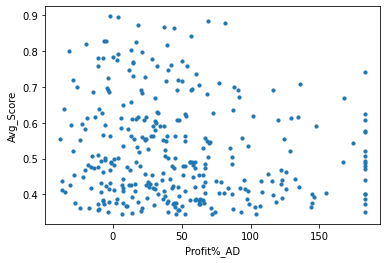

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replacing outliers with Max below outliers
df_portfolio['Profit%_AD'] = df_portfolio['Profit%']
median = df_portfolio['Profit%'].median()
std = df_portfolio['Profit%'].std()
outliers = (df_portfolio['Profit%'] - median).abs() > (2 * std)
replacement = df_portfolio['Profit%'][outliers].min()
df_portfolio['Profit%_AD'][outliers] = replacement

df_portfolio.plot(kind='scatter', x='Profit%_AD', y='Avg_Score', s=10)

In [69]:
#df_summary = df_portfolio[['Main_decile','Invested','Current_Value','Profit']].sum()
df_summary = df_portfolio.groupby(['Main_decile']).sum()
df_summary['Profit%'] = (df_summary['Profit']/df_summary['Invested'])*100
df_summary

,Start_Price,Final_Price,Quantity,Invested,Current_Value,Profit,Profit%,Avg_Score,Profit%_AD
Main_decile,,,,,,,,,
Decile_25,"61,299.47","80,957.40","18,640.00","2,677,984.60","4,097,551.02","1,419,566.42",53.01,19.82,"2,572.34"
Decile_26,"45,773.21","65,118.80","14,442.00","2,675,487.86","4,350,515.46","1,675,027.60",62.61,22.01,"3,119.74"
Decile_27,"47,405.87","70,485.50","14,823.00","2,676,803.62","4,189,939.01","1,513,135.40",56.53,24.63,"2,673.03"
Decile_28,"62,080.15","91,726.93","6,603.00","2,669,104.76","4,192,783.82","1,523,679.06",57.09,28.23,"2,806.06"
Decile_29,"96,598.42","127,749.50","4,728.00","2,651,745.39","4,005,625.11","1,353,879.71",51.06,33.07,"2,462.17"
Decile_30,"205,548.03","256,259.47","2,903.00","2,592,146.89","3,408,525.61","816,378.72",31.49,41.35,"1,690.12"
Nifty,"14,132.90","17,203.95",3.00,"42,398.70","51,611.85","9,213.15",21.73,0.00,21.73


In [70]:
df_trend_transposed = df_trend.transpose().reset_index()
#df_trend_transposed.columns[1] = 'Tikr'
df_trend_transposed.rename(columns={ df_trend_transposed.columns[0]: "Tikr" }, inplace = True)
df_trend_transposed = pd.merge(df_trend_transposed,df_portfolio[['Tikr','Quantity','Main_decile']], how='left',left_on=['Tikr'], right_on=['Tikr'])

# Taking the trend of Nifty into a different dataframe
df_trend_nifty = pd.DataFrame(df_trend_transposed.iloc[df_trend_transposed.shape[0]-1,:])
df_trend_nifty.columns = df_trend_nifty.iloc[0]
df_trend_nifty = df_trend_nifty.drop(df_trend_nifty.index[0])

# Multiplying the quantity by value
#df_trend_transposed = df_trend_transposed.iloc[:,1:-1] * df_trend_transposed.iloc[:,-1]
for col in range(len(df_trend_transposed.columns)):
    if col > 0 and col <  len(df_trend_transposed.columns) - 2:
        df_trend_transposed.iloc[:,col] = df_trend_transposed.iloc[:,col].multiply(df_trend_transposed['Quantity'], axis='index')

#df_trend_transposed = df_trend_transposed.iloc[:,1:-2].multiply(df_trend_transposed['Quantity'], axis='index')
# df_trend_transposed['Main_decile'][df_trend_transposed['Tikr'] == '^NSEI'] = 'Nifty'

df_trend_sum = df_trend_transposed.groupby(['Main_decile']).sum()
df_trend_sum = df_trend_sum.drop(['Quantity'],axis = 1)
df_trend_sum

,2021-01-01,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-11,2021-01-12,2021-01-13,2021-01-14,...,2021-12-17,2021-12-20,2021-12-21,2021-12-22,2021-12-23,2021-12-24,2021-12-27,2021-12-28,2021-12-29,2021-12-30
Main_decile,,,,,,,,,,,,,,,,,,,,,
Decile_25,"2,631,737.42","2,677,984.60","2,701,631.58","2,708,037.16","2,732,005.71","2,773,754.77","2,782,527.85","2,814,018.38","2,803,585.79","2,819,054.70",...,"4,034,021.82","3,884,953.19","3,960,601.89","4,012,172.25","4,050,747.16","4,038,475.35","4,051,958.88","4,110,255.96","4,121,019.41","4,097,551.02"
Decile_26,"2,631,252.54","2,675,487.86","2,678,457.37","2,688,075.12","2,708,916.11","2,742,389.20","2,741,536.82","2,749,159.70","2,740,179.00","2,742,521.31",...,"4,311,014.50","4,147,801.39","4,190,823.79","4,252,598.24","4,267,544.09","4,242,602.54","4,258,300.04","4,329,679.99","4,348,737.71","4,350,515.46"
Decile_27,"2,658,713.76","2,676,803.62","2,693,542.78","2,719,542.55","2,759,748.68","2,800,670.67","2,813,073.80","2,828,825.63","2,824,671.12","2,821,244.80",...,"4,015,402.12","3,876,022.48","3,926,304.77","4,024,716.45","4,088,363.77","4,030,375.08","4,055,720.14","4,123,463.51","4,153,292.76","4,189,939.01"
Decile_28,"2,632,549.68","2,669,104.76","2,683,666.37","2,680,287.07","2,703,080.08","2,740,843.44","2,743,662.92","2,744,562.57","2,744,098.36","2,742,897.53",...,"4,105,753.93","3,994,949.49","4,060,168.01","4,117,300.31","4,142,842.20","4,109,950.20","4,112,935.07","4,148,064.56","4,167,536.70","4,192,783.82"
Decile_29,"2,628,402.34","2,651,745.39","2,668,329.45","2,665,442.98","2,668,543.28","2,697,148.02","2,710,616.04","2,709,037.93","2,687,588.33","2,701,187.46",...,"3,910,799.10","3,801,122.53","3,860,248.20","3,916,410.62","3,939,474.49","3,918,351.55","3,940,889.41","3,993,618.92","4,009,398.52","4,005,625.11"
Decile_30,"2,561,894.23","2,592,146.89","2,631,123.59","2,631,994.77","2,631,899.57","2,651,188.44","2,651,897.63","2,645,138.97","2,636,097.95","2,634,219.59",...,"3,362,539.55","3,276,764.59","3,304,206.98","3,348,624.77","3,377,443.94","3,351,754.38","3,360,409.82","3,402,571.66","3,410,876.93","3,408,525.61"
Nifty,0.00,"42,398.70","42,598.50","42,438.75","42,412.05","43,041.75","43,454.25","43,690.35","43,694.55","43,786.80",...,"50,955.60","49,842.60","50,312.55","50,866.35","51,217.80","51,011.25","51,258.75","51,699.75","51,640.80","51,611.85"


In [71]:
df_trend = df_trend_sum.transpose()
# First 
# row for Nifty is blank so we will assign it and then do the rest of the adjustments
df_trend.iloc[0,len(df_trend.columns)-1] = df_trend.iloc[1,len(df_trend.columns)-1]
df_trend
df_trend.to_clipboard()
df_normalized = df_trend.div(df_trend.iloc[0]).multiply(1000000)
df_normalized

Main_decile,Decile_25,Decile_26,Decile_27,Decile_28,Decile_29,Decile_30,Nifty
2021-01-01,"1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00"
2021-01-04,"1,017,572.87","1,016,811.51","1,006,803.99","1,013,885.81","1,008,881.08","1,011,808.71","1,000,000.00"
2021-01-05,"1,026,558.18","1,017,940.06","1,013,099.95","1,019,417.18","1,015,190.64","1,027,022.72","1,004,712.38"
2021-01-06,"1,028,992.16","1,021,595.26","1,022,879.03","1,018,133.52","1,014,092.46","1,027,362.78","1,000,944.58"
2021-01-07,"1,038,099.65","1,029,515.82","1,038,001.43","1,026,791.67","1,015,272.00","1,027,325.62","1,000,314.81"
...,...,...,...,...,...,...,...
2021-12-24,"1,534,528.22","1,612,388.96","1,515,911.62","1,561,205.18","1,490,773.12","1,308,310.99","1,203,132.37"
2021-12-27,"1,539,651.65","1,618,354.75","1,525,444.45","1,562,339.02","1,499,347.86","1,311,689.52","1,208,969.82"
2021-12-28,"1,561,803.21","1,645,482.49","1,550,924.20","1,575,683.30","1,519,409.29","1,328,146.81","1,219,371.08"
2021-12-29,"1,565,893.08","1,652,725.33","1,562,143.63","1,583,079.98","1,525,412.78","1,331,388.66","1,217,980.68"


<AxesSubplot:>

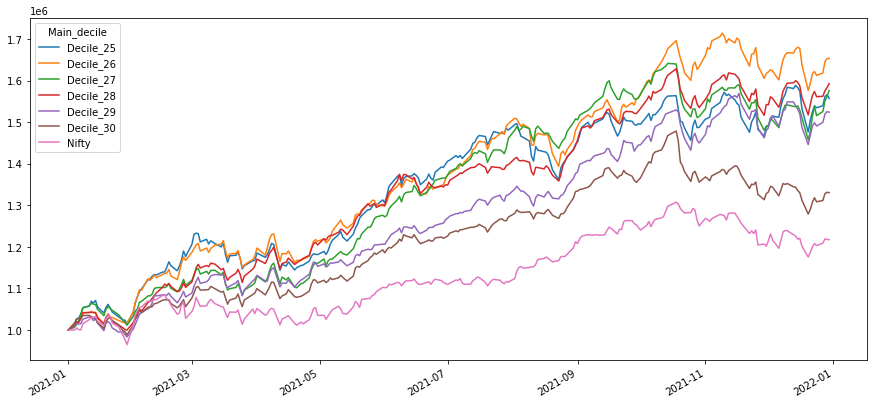

In [72]:
df_normalized= df_normalized[df_normalized['Nifty'] != 0]
df_normalized.dropna().plot(figsize=(15,7))

In [73]:
df_summary
#Finish

,Start_Price,Final_Price,Quantity,Invested,Current_Value,Profit,Profit%,Avg_Score,Profit%_AD
Main_decile,,,,,,,,,
Decile_25,"61,299.47","80,957.40","18,640.00","2,677,984.60","4,097,551.02","1,419,566.42",53.01,19.82,"2,572.34"
Decile_26,"45,773.21","65,118.80","14,442.00","2,675,487.86","4,350,515.46","1,675,027.60",62.61,22.01,"3,119.74"
Decile_27,"47,405.87","70,485.50","14,823.00","2,676,803.62","4,189,939.01","1,513,135.40",56.53,24.63,"2,673.03"
Decile_28,"62,080.15","91,726.93","6,603.00","2,669,104.76","4,192,783.82","1,523,679.06",57.09,28.23,"2,806.06"
Decile_29,"96,598.42","127,749.50","4,728.00","2,651,745.39","4,005,625.11","1,353,879.71",51.06,33.07,"2,462.17"
Decile_30,"205,548.03","256,259.47","2,903.00","2,592,146.89","3,408,525.61","816,378.72",31.49,41.35,"1,690.12"
Nifty,"14,132.90","17,203.95",3.00,"42,398.70","51,611.85","9,213.15",21.73,0.00,21.73


In [74]:
df_portfolio.to_clipboard()

In [75]:
df_summary.to_clipboard()